# Week 4 (Wednesday), AST 8581 / PHYS 8581 / CSCI 8581: Big Data in Astrophysics

### Michael Coughlin <cough052@umn.edu>, Jie Ding <dingj@umn.edu>


Based on notebooks available here: https://github.com/markjay4k/fourier-transform; and with contributions totally ripped off from and Gautham Narayan (UIUC), Michael Steinbach (UMN), and Nico Adams (UMN)

# Where are we headed?

Foundations of Data and Probability -> Statistical frameworks (Frequentist vs Bayesian) -> Estimating underlying distributions -> <b> Analysis of Time series (periodicity) </b> -> Analysis of Time series (variability) -> Analysis of Time series (stochastic processes) -> Gaussian Processes -> Decision Trees / Regression -> Dimensionality Reduction -> Principle Component Analysis -> Clustering -> Density Estimation / Anomaly Detection -> Supervised Learning -> Deep Learning -> Introduction to Databases - SQL -> Introduction to Databases - NoSQL -> Introduction to Multiprocessing -> Introduction to GPUs -> Unit Testing

### Back in week 1, I claimed that we only ever measured three things in astrophysics
1. Angular separations 
2. Energy differences
3. Time differences

## What is a time-series?

We observe a source not just once, but often have several repeated observations

### $$ (t_1, m_1), (t_2, m_2), ... , (t_N, m_n) $$


A **time-series** is any sequence of observation such that the distribution of $m_k$ depends on $m_{k-1}, m_{k-2}...$.
Time is an **exogeneous** (outside the model) variable that is **directional** - measurements only depend on the past.
This is a statement of **causality**. 

Applies to astronomical measurements, your brain's electrical activity, the stock market, number of infected people...

These observations are typically not uniformly sampled - nor can they be from Earth even in principle (rotation, revolution). 

Virtually all statistical methods assume uniform sampling.  


## Why should you care?

Everything changes.

<table>
    <tr>
        <td><img src="figures/transient_sky.jpg" width=400></td>
    </tr>
</table>

credit: Francisco Forster (ALeRCE broker team)

### What statistical questions can you ask of a time-series?


<table>
    <tr>
        <td><img src="figures/cow.png" width=500></td>
    </tr>
</table>

### What jumps out at you? Speculate as to why. How might you model this?

What you are doing is a combination of **trend detection**, **forecasting**, and **period finding** 

## In-class warm-up: What statistical questions can you ask of a time-series


<table>
    <tr>
        <td><img src="figures/tsunami.jpg" width=400></td>
    </tr>
</table>

## When did the earthquake begin and end? When did the main shocks of the Boxing Day Tsunami happen? How far apart are they?

What you are doing is a combination of **event finding** and **change point detection**. 

## What statistical questions can you ask of a time-series

1. Trend detection
2. Periodicity detection
3. Event detection
4. Point of change detection
5. Forecasting

All of which are linked to each other. Note that none of these datasets are astronomical.

## You've already seen datasets with periodic behavior in astrophysics.

<img src="figures/flare.png" style="float: left; width: 30%; margin-right: 1%;"> <img src="figures/cepheid.png" style="float: left; width: 30%; margin-right: 1%;"> <img src="figures/eclipsing.png" style="float: left; width: 30%; margin-right: 1%; margin-bottom: 0.5em;">

# Fourier Series and Fourier Transform

We can approximate a periodic function of period P to arbitrary accuracy by adding sine and cosine terms. This process is known as a Fourier Series, computed as

$$
f(x) = \frac{a_0}{2} + \sum_{n=1}^{\infty} a_n \cos(nx) + b_n \sin(nx)
$$

### Let's look at the square wave centered at $x=0$

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
pi = np.pi
x = np.linspace(-3*pi, 3*pi, 1000)

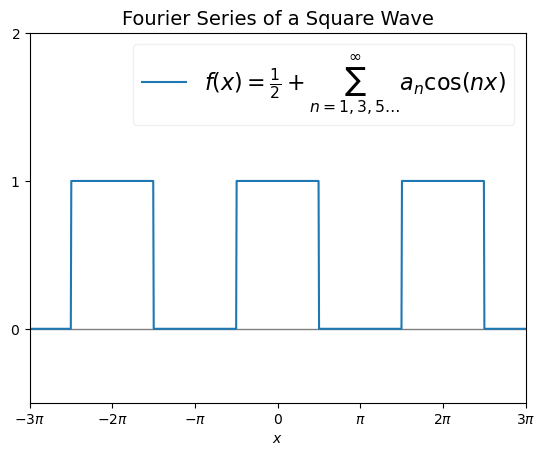

In [2]:
plt.axhline(0, color='gray', lw=1)
plt.plot(x, 0.5 + 0.5 * signal.square(x + pi/2), lw=1.5, 
         label=r'$f(x)=\frac{1}{2} + \sum_{n=1,3,5\ldots}^{\infty}a_n \cos(nx)$')
plt.yticks([-1, 0, 1, 2], ['$-1$', '$0$', '$1$', '$2$'])
plt.xticks([-3*pi, -2*pi, -1*pi, 0, pi, 2*pi, 3*pi], ['$-3\pi$', '$-2\pi$', '$-\pi$', '$0$', '$\pi$', '$2\pi$', '$3\pi$'])
plt.xlim(-3*pi, 3*pi)
plt.ylim(-0.5, 2)
plt.legend(fontsize=16, fancybox=True, framealpha=0.3, loc='best')
plt.rcParams['figure.figsize'] = (11, 4)
plt.rcParams.update({'font.size': 16})
plt.title('Fourier Series of a Square Wave', fontsize=14)
plt.xlabel('$x$')
plt.show()

### But we didn't show how to calculate $a_n$

### Let's change our Fourier Series Equation

$$
f(x) = \frac{a_0}{2} + \sum_{n=1}^{\infty} a_n \cos(n \omega_0 x) + b_n \sin(n \omega_o x)
$$

### where

$$
\omega_0 =\frac{2\pi}{T}
$$

### and $T$ is the fundamental period (for the square wave above, $T=2\pi$)

### The equation for $a_n$ is
$$
a_n = \frac{2}{T}\int_{-T/2}^{T/2} f(x)\cos(n \omega_0 x)dx
$$

### For the square wave above, the limits are only $-T/4$ to $T/4$ because $f(x)=0$ for the rest of the function.

$$
a_n = \frac{2}{T} \int_{-T/4}^{T/4}\cos(n \omega_0 x)dx
$$

### Because $\cos(nx)$ is even, we can reduce the limits to $0$ to $T/4$ and multiply by $2$

$$
a_n = \frac{4}{T} \int_{0}^{T/4}\cos(n \omega_0 x)dx
$$

$$
a_n = \frac{4}{n \omega_0 T} \sin(n \omega_0 x)\bigg|^{T/4}_0  =\frac{4}{n \omega_0 T}\sin \left( n\omega_0 \frac{T}{4} \right)
$$

$$
a_n =\frac{2}{n\pi}\sin \left(n \omega_0 \frac{\pi}{2} \right)
$$

### And of course we can plot this

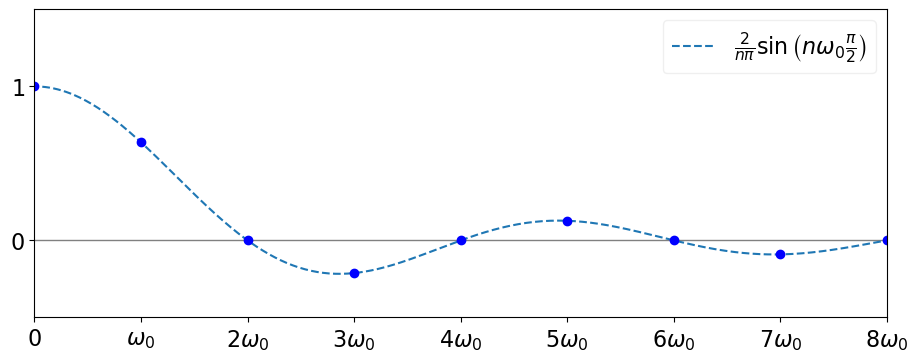

In [3]:
plt.axhline(0, color='gray', lw=1)
plt.plot(x, 2/(x*pi) * np.sin(x * pi/2), '--', label=r'$\frac{2}{n\pi}\sin \left( n\omega_0 \frac{\pi}{2} \right)$')
an = [2/(n*pi) * np.sin(n * pi/2) for n in range(1, 10)]
plt.plot(0, 1, 'bo')
plt.plot(range(1, 10), an, 'bo')
plt.yticks([-1, 0, 1, 2], ['$-1$', '$0$', '$1$', '$2$'])
plt.xticks(list(range(9)),
          ['$0$', '$\omega_0$', '$2\omega_0$', '$3\omega_0$', '$4\omega_0$', 
           '$5\omega_0$', '$6\omega_0$', '$7\omega_0$', '$8\omega_0$'])
plt.xlim(0, 8)
plt.ylim(-0.5, 1.5)
plt.legend(fontsize=16, fancybox=True, framealpha=0.3, loc='best')
plt.show()

# In-class warm-up: What if we make the squares farther apart by making $T=4\pi$ ?

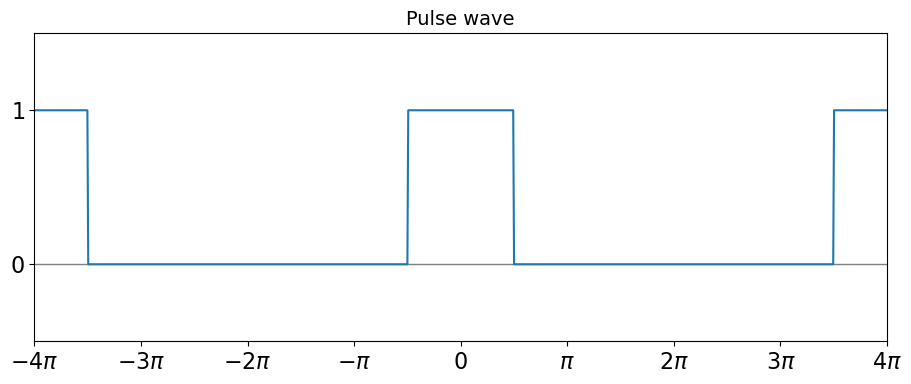

In [4]:
plt.axhline(0, color='gray', lw=1)
x = np.linspace(-4*pi, 4*pi, 1000)
f = (0.5 + 0.5 * signal.square(x + pi/2)) * (0.5 + 0.5 * signal.square(x/2 + pi/2))
plt.plot(x, f, lw=1.5)
plt.yticks([-1, 0, 1], ['$-1$', '$0$', '$1$'])
plt.xticks([-4*pi, -3*pi, -2*pi, -1*pi, 0, pi, 2*pi, 3*pi, 4*pi],
          ['$-4\pi$', '$-3\pi$', '$-2\pi$', '$-\pi$', '$0$', '$\pi$', '$2\pi$', '$3\pi$', '$4\pi$'])
plt.rcParams.update({'font.size': 16})
plt.xlim(-4*pi, 4*pi)
plt.ylim(-0.5, 1.5)
plt.rcParams['figure.figsize'] = (11, 4)
plt.title('Pulse wave', fontsize=14)
plt.show()

### What are the new $a_n$ coefficients?

Remember to use markdown to render your equations!

The new fundamental frequency becomes $\omega'_0 =\omega_0/2$ 

$$
a_n = \frac{4}{n\omega'_0 T} \sin \left(n\omega'_0\frac{T}{8}\right)
$$

$$
a_n = \frac{2}{n\pi} \sin \left(n \omega'_0 \frac{\pi}{2} \right)
$$

### Make a plot of your new coefficients

What do you notice about the spacing of the coefficients? And their amplitudes?

Since the fundamental frequency is cut in half, the spacing between coefficients are closer, but bound by the same envelope

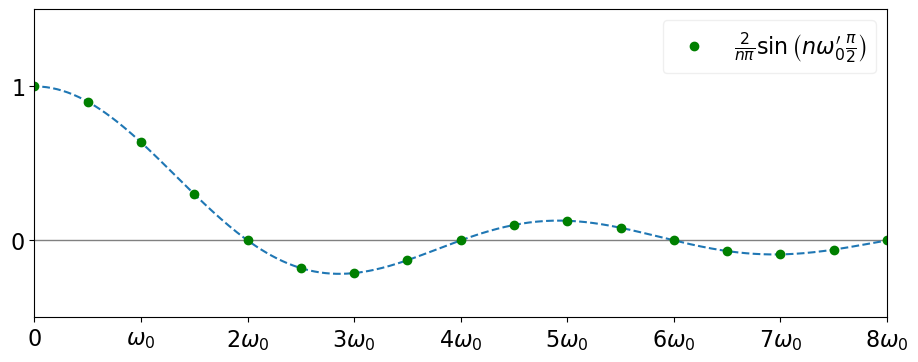

In [5]:
plt.axhline(0, color='gray', lw=1)
plt.plot(x, 2/(x*pi) * np.sin(x * pi/2), '--')
nprime = np.arange(0.5, 10, 0.5)
an2 = [2/(n*pi) * np.sin(n * pi/2) for n in nprime]
plt.plot(0, 1, 'go')
plt.plot(nprime, an2, 'go', label=r"$\frac{2}{n\pi}\sin \left( n\omega_0' \frac{\pi}{2} \right)$")
plt.yticks([-1, 0, 1, 2], ['$-1$', '$0$', '$1$', '$2$'])
plt.xticks(list(range(9)),
          ['$0$', '$\omega_0$', '$2\omega_0$', '$3\omega_0$', '$4\omega_0$', 
           '$5\omega_0$', '$6\omega_0$', '$7\omega_0$', '$8\omega_0$'])
plt.xlim(0, 8)
plt.ylim(-0.5, 1.5)
plt.legend(fontsize=16, fancybox=True, framealpha=0.3, loc='best')
plt.show()

### And of course we can animate this process to see how it performs in general

In [6]:
import numpy as np

def rect(x, B):
    """
    create a rectangle function
    returns a numpy array that is 1 if |x| < w and 0 if |x| > w
    B is the rectangle width centered at 0
    x is the number of points in the array
    """
    
    B = int(B)
    x = int(x)
    
    high = np.ones(B)
    low1 = np.zeros(int(x/2 - B/2))    
    x1 = np.append(low1, high)
    rect = np.append(x1, low1)
    
    if x > len(rect):
        rect = np.append(rect, 0)
    elif x < len(rect):
        rect = rect[:-1]

    return rect

<IPython.core.display.Javascript object>


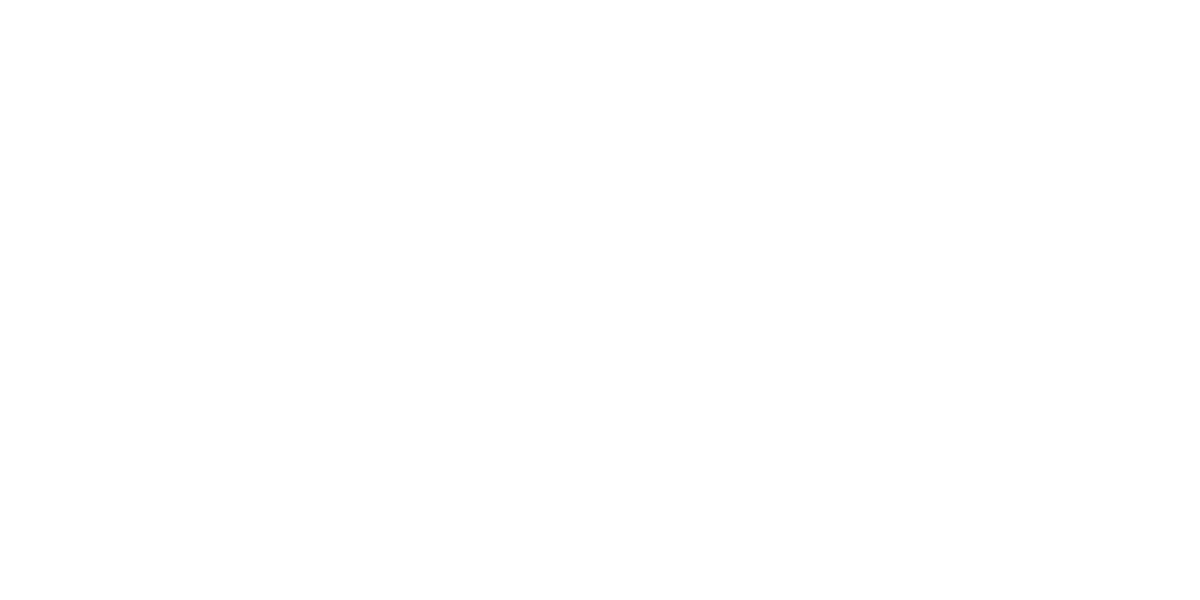

In [7]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# constants and x array
pi = np.pi
length = 2000
x = np.linspace(-1, 1, length)

# create figure and axes 
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6))

# creating our line objects for the plots
sinc, = ax1.plot(x, np.sin(x), '-b')
box, = ax2.plot(x, np.sin(x), '-r')

def animate(B):
    """
    this function gets called by FuncAnimation
    each time called, it will replot with a different width "B"
    
    B: rect width
    
    return:
        sinc: ydata
        box: ydata
    """
    
    # create our rect object
    f = rect(len(x), B)
    box.set_ydata(f)
    
    # create our sinc object
    F = (B / length) * np.sin(x * B / 2) / (x * B / 2)
    sinc.set_ydata(F)
    
    # adjust the sinc plot height in a loop
    ax1.set_ylim(np.min(F), np.max(F))
    
    # format the ax1 yticks
    plt.setp(ax1, xticks=[-0.25, 0.25], xticklabels=['-1/4', '1/4'],
             yticks=[0, np.max(F)], yticklabels=['0', 'B={:.2f}'.format((B / length))])
    
    # format the ax2 xticks to move with the box
    plt.setp(ax2, yticks=[0, 1], 
             xticks=[-1, -1 * B / length, 1 * B / length, 1], xticklabels=['-1', '-B/2', 'B/2', '1'])
    
def init():
    """
    initialize the figure
    """
    
    ax2.set_ylim(-0.2, 1.1)
    ax1.set_xlim(-0.25, 0.25)
    ax2.set_xlim(-1, 1)
    ax1.axhline(0, color='black', lw=1)
    ax2.axhline(0, color='black', lw=1)
    plt.rcParams.update({'font.size':14})
    
    return sinc, box,

# the FuncAnimation function iterates through our animate function using the steps array
step = 10
steps = np.append(np.arange(10, 1000, step), np.arange(1000, 10, -1 * step))
ani = FuncAnimation(fig, animate, steps, init_func=init, interval=50, blit=True)
plt.show()

# Fourier Transform

1. Fourier Transform is a generalized version of the Fourier Series
2. It applies to both period and non periodic functions 
   - For periodic functions, the spectrum is discrete
   - For non-period functions, the spectrum is continuous 

The Fourier Transform by itself can be powerful if 
1. the signal-to-noise is high
2. the signal is continious and uniformly sampled 
3. the shape you are modeling is simple and can be decomposed into a few Fourier terms.

Unfortunately, these are not the usual conditions we have when taking data. We will look at this case next time.

### The Fourier Series becomes the Fourier Transform when
$$
T \rightarrow \infty, \qquad \omega_0 \rightarrow 0
$$

### Definitions

#### Fourier Transform

Fourier Transform of $f(x)$ is $F(k)$
$$
F(k) = \mathcal{FT}\{f(x)\}
$$

$$
F(k) = \int_{-\infty}^{\infty}f(x) \exp(-ikx)dx
$$

where $k=\frac{2\pi}{x}$ is called the "wavenumber"

#### Inverse Fourier Transform

To go back to $f(x)$, the formula is

$$
f(x) = \mathcal{FT}^{-1}\{F(k)\}
$$

$$
f(x) = \frac{1}{2\pi} \int_{-\infty}^{\infty}F(k) \exp(ikx)dx
$$

Since $x$ and $k$ are inversely proportional, the "size" of $f(x)$ and $F(k)$ are inversely proportional. 
What this means is, 
 - a compact $f(x)$ will have a broad spectrum.
 - a broad $f(x)$ will have a compact spectrum

### Rectangle function

The $rext_B(x)$ function is a rectangle centered at $x=0$ with $\text{Height}=1$ and $\text{Width}=B$. The Formula can be written as 

$$
\text{rect}_B(x) =
\begin{cases}
0 & \text{if} \,\,\, |x| > B/2\\[2pt]
1/2 & \text{if} \,\,\, |x| = B/2 \\[2pt]
1 & \text{if} \,\,\, |x| < B/2
\end{cases}
$$

The cell below is a simple function for creating $\text{rect}_B(x)$

### Example Fourier Transform of $\text{rect}$ function

Using the FT definition and the $\text{rect}_B(x)$ equation, the FT is

$$
F(k) = \int_{-B/2}^{B/2} \exp(-ikx)dx
$$

$$
= -\frac{1}{ik} \exp(-ikx) \, \Big|_{-B/2}^{\,B/2}
$$

$$
= -\frac{1}{ik} \left[ \exp(-ikB/2) - \exp(ikB/2)\right]
$$

Using the complex definition of sine from Euler's formula

$$
\sin(x) = \frac{e^{ix} - e^{-ix}}{2i}
$$

Our equation for $F(k)$ can be re-written as 

$$
F(k) = \frac{2}{k}\frac{\exp(ikB/2) - \exp(-ikB/2)}{2i}
$$

$$
= \frac{2}{k} \sin(kB/2)
$$

$$
= B \frac{\sin(kB/2)}{kB/2}
$$


$$
F(k) = B \text{sinc}(kB/2)
$$

# Example Fourier Transform from the scipy docs: FFT of the sum of two sines.

<IPython.core.display.Javascript object>


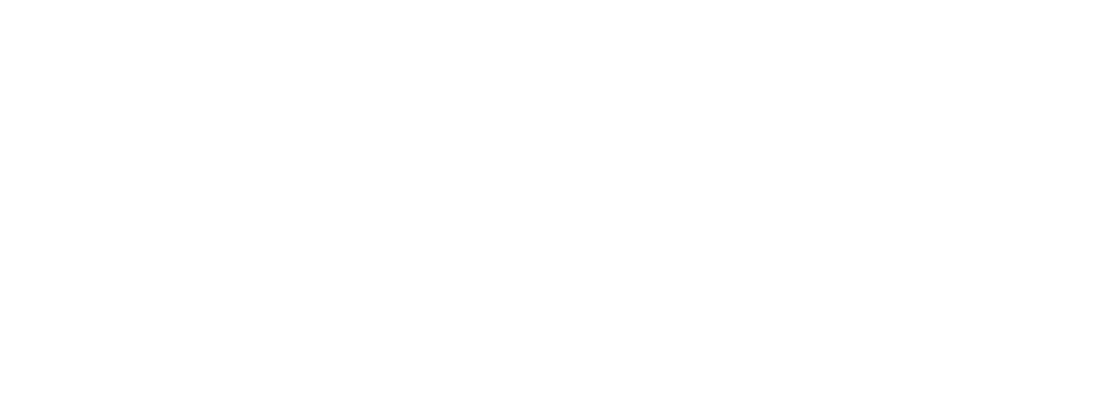

In [8]:
from scipy.fft import fft, fftfreq
from scipy.signal import blackman

# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)

xf = fftfreq(N, T)[:N//2]

plt.figure()
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-b')
plt.grid()
plt.show()

# In-class warm-up: windowing functions

Notice from the above, there is power at frequencies other than the ones we injected in the original time-series. This arises due to the use of finite data sets; this is a common occurance as we might be interested in their spectral content only during a certain time period. 

To address this, the Fourier transform is **usually** applied to the product of the waveform and a window function. Any window (including rectangular) affects the spectral estimate computed by this method.We will look at windowing functions to remove the long tail of power outside of our frequencies. Look here: https://docs.scipy.org/doc/scipy/reference/signal.windows.html for possible window functions.

<IPython.core.display.Javascript object>


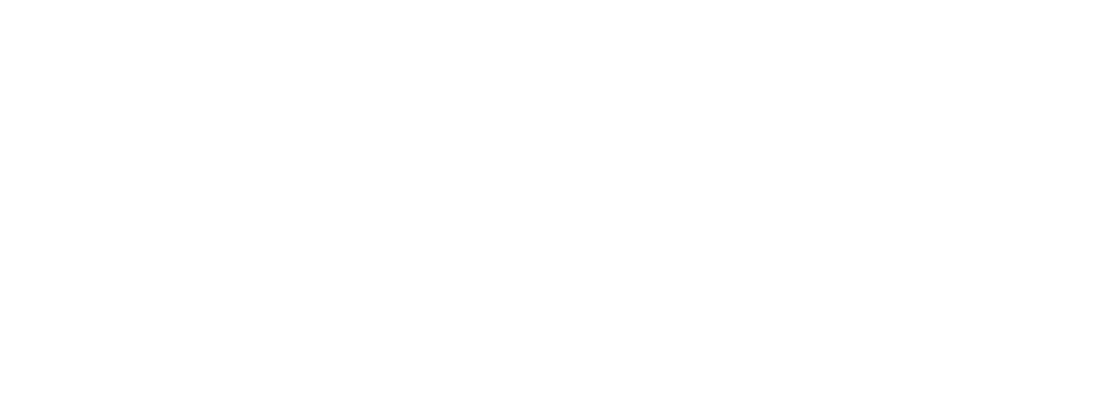

In [9]:
from scipy.fft import fft, fftfreq

# Import one of the window functions from above
from scipy.signal import blackman

# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)

# create window same length as the signal
w = blackman(N)
# multiply time-series by window function and take FFT
ywf = fft(y*w)
xf = fftfreq(N, T)[:N//2]

# compare the resulting Fourier transforms
plt.figure()
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-b')
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf[1:N//2]), '-r')
plt.legend(['FFT', 'FFT w. window'])
plt.grid()
plt.show()

# Nyquist Sampling

Nyquist: "In order to recover all Fourier components of a periodic waveform, it is necessary to use a sampling rate fs at least twice the highest waveform frequency"

The above statement requires the user to sample a signal at twice the highest natural frequency of the expected system, or mathematically:

$\large f_{Nyq} = 2\cdot f_{natural}$

Therefore, in the FFT function, the limitation of the frequency component is set by the sample rate, which is typically a little higher than twice the highest natural frequency expected in the system. In the case of acoustics, the sample rates are set at approximately twice the highest frequency that humans are capable of discerning (20 kHz), so the sample rate for audio is at minimum 40 kHz. We often see 44.1 kHz or 48 kHz, which means audio is often sampled correctly above the Nyquist frequency set by the range of the human ear. 

Therefore, in practice, it is essential to adhere to the following inequality:
$\large f_{Nyq} = 2\cdot f_{natural} \rightarrow f_s \geq f_{Nyq}$

As a visualization tool, below I have plotted several sampled signals that are sampled around the Nyquist frequency for a sine wave.

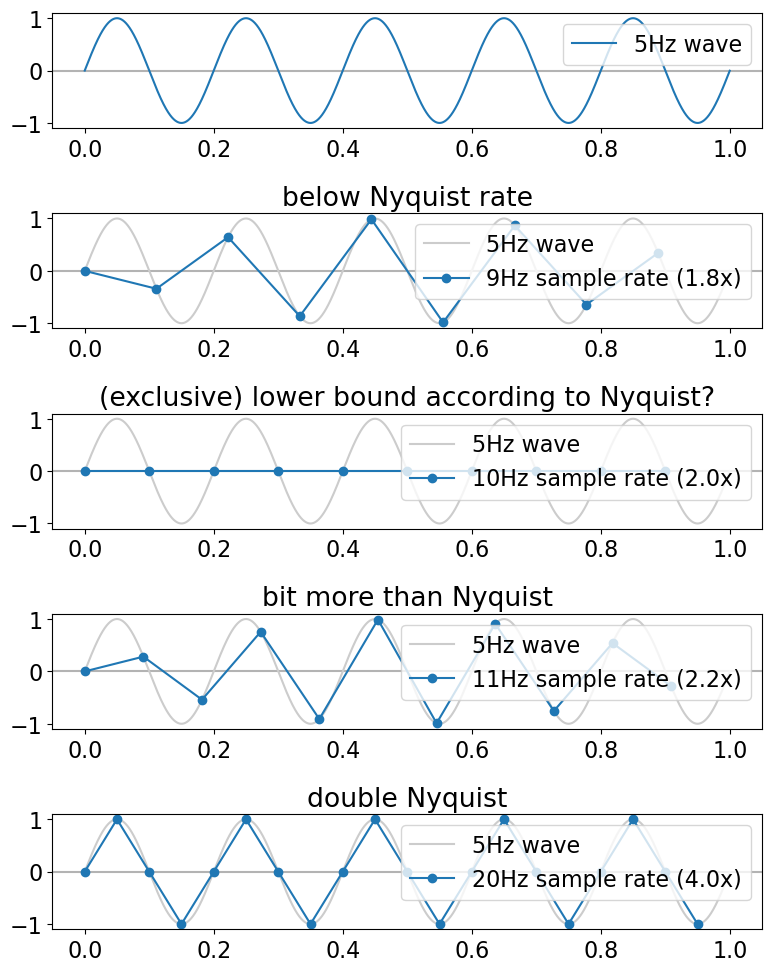

In [10]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

wave_freq = 5
domain = 1
# Number of sample points
N = 10000

sample_rates = (
    (wave_freq * 2 - 1, 'below Nyquist rate'),
    (wave_freq * 2, '(exclusive) lower bound according to Nyquist?'),
    (wave_freq * 2 + 1, 'bit more than Nyquist'),
    (wave_freq * 4, 'double Nyquist'),
)

n_plots = len(sample_rates) + 1

fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(n_plots, 1,  1)

x_hi_res = np.linspace(0.0, domain, N, endpoint=False)
hi_res = np.sin(wave_freq * 2.0*np.pi*x_hi_res)
ax.axhline(color="0.7")
ax.plot(x_hi_res, hi_res, label=f'{wave_freq}Hz wave')
ax.legend(loc=1)
ylim = ax.get_ylim()

for i, (sample_rate, title) in enumerate(sample_rates):
    ax = fig.add_subplot(n_plots, 1, i+2)

    x = np.linspace(0.0, domain, sample_rate, endpoint=False)
    samples = np.sin((2 * np.pi * wave_freq) * x)
    ax.axhline(color="0.7")
    ax.plot(x_hi_res, hi_res, label=f'{wave_freq}Hz wave', color='0.8') # show what we're aiming for
    ax.plot(x, samples, marker='o', label=f'{sample_rate}Hz sample rate ({sample_rate/wave_freq}x)')
    ax.set_ylim(*ylim)
    ax.legend(loc=1)
    ax.set_title(title)
    
fig.tight_layout()

# In-class Exercise: plot the Fourier transforms of the sine waves with different sample rates.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


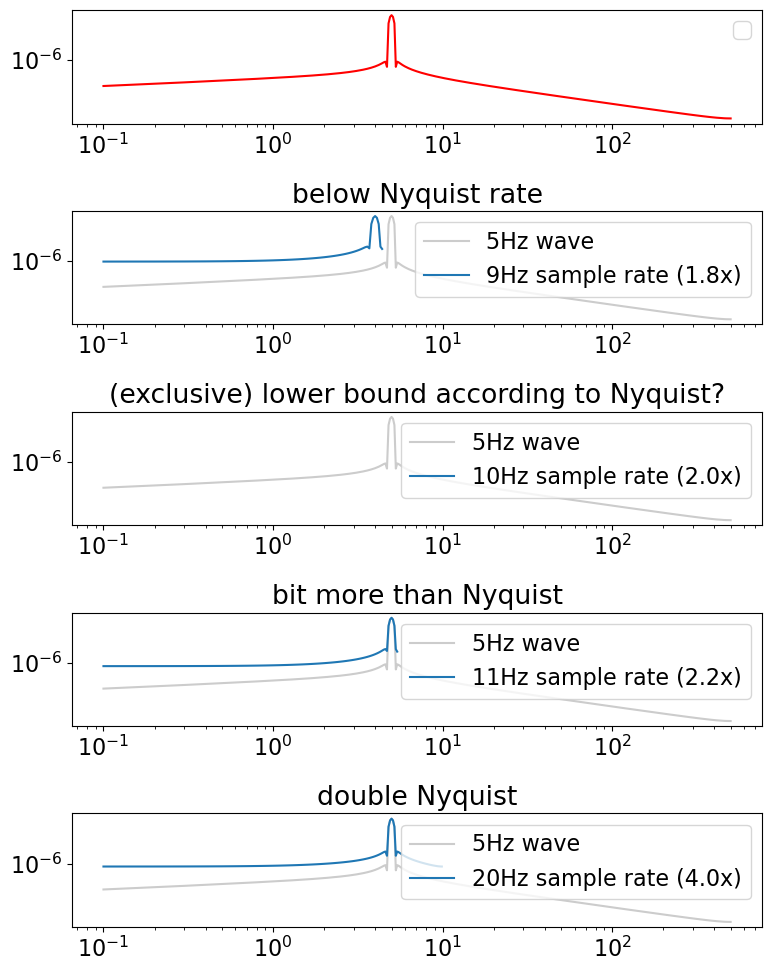

In [11]:
# YOUR CODE HERE
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import blackman

wave_freq = 5
domain = 10
# Number of sample points
N = 10000

sample_rates = (
    (wave_freq * 2 - 1, 'below Nyquist rate'),
    (wave_freq * 2, '(exclusive) lower bound according to Nyquist?'),
    (wave_freq * 2 + 1, 'bit more than Nyquist'),
    (wave_freq * 4, 'double Nyquist'),
)

n_plots = len(sample_rates) + 1

fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(n_plots, 1,  1)

x_hi_res = np.linspace(0.0, domain, N, endpoint=False)
hi_res = np.sin(wave_freq * 2.0*np.pi*x_hi_res)

# sample spacing
T = x_hi_res[1] - x_hi_res[0]

# create window same length as the signal
w = blackman(N)
# multiply time-series by window function and take FFT
ywf_hi_res = fft(hi_res*w)
xf_hi_res = fftfreq(N, T)[:N//2]

plt.loglog(xf_hi_res[1:N//2], 2.0/N * np.abs(ywf_hi_res[1:N//2]), '-r')
ax.legend(loc=1)
ylim = ax.get_ylim()

for i, (sample_rate, title) in enumerate(sample_rates):
    ax = fig.add_subplot(n_plots, 1, i+2)

    x = np.linspace(0.0, domain, sample_rate*domain, endpoint=False)
    T = x[1] - x[0]
    samples = np.sin((2 * np.pi * wave_freq) * x)
    N2 = len(x)
    
    # create window same length as the signal
    w = blackman(N2)
    # multiply time-series by window function and take FFT
    ywf = fft(samples*w)
    xf = fftfreq(N2, T)[:N//2]

    plt.loglog(xf_hi_res[1:N//2], 2.0/N * np.abs(ywf_hi_res[1:N//2]), label=f'{wave_freq}Hz wave', color='0.8') # show what we're aiming for
    plt.loglog(xf[1:N2//2], 2.0/N2 * np.abs(ywf[1:N2//2]), label=f'{sample_rate}Hz sample rate ({sample_rate/wave_freq}x)')
    
    ax.axhline(color="0.7")
    ax.set_ylim(*ylim)
    ax.legend(loc=1)
    ax.set_title(title)
    
fig.tight_layout()

# In-class Exercise: Fourier Transform of RR-Lyrae

How many frequencies do you need to reproduce the time-series?

In [12]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import astroML.datasets.rrlyrae_templates
from astroML.datasets import fetch_rrlyrae_templates

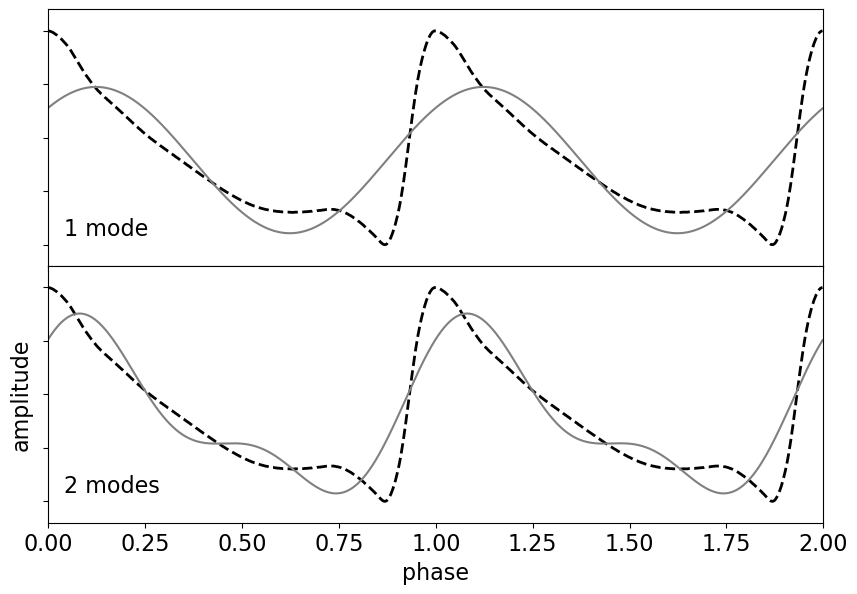

In [13]:
# RUN THIS

# Load the RR Lyrae template
templates = fetch_rrlyrae_templates()
x, y = templates['115r'].T

# Plot the results
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(hspace=0)

# TEST MODES HERE
kvals = [1, 2]
subplots = [311, 312]

for (k, subplot) in zip(kvals, subplots):
    ax = fig.add_subplot(subplot)

    # Use FFT to fit a truncated Fourier series
    # reconstruct using k frequencies
    y_fft = np.fft.fft(y) # compute FFT
    y_fft[k + 1:-k] = 0 # zero-out frequencies higher than k
    y_fit = np.fft.ifft(y_fft).real # reconstruct using k modes

    # plot the true value and the k-term reconstruction
    ax.plot(np.concatenate([x, 1 + x]),
            np.concatenate([y, y]), '--k', lw=2)
    ax.plot(np.concatenate([x, 1 + x]),
            np.concatenate([y_fit, y_fit]), color='gray')

    label = "%i mode" % k
    if k > 1:
        label += 's'

    ax.text(0.02, 0.1, label, ha='left', va='bottom',
            transform=ax.transAxes)

    if subplot == subplots[-1]:
        ax.set_xlabel('phase')
    else:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    if subplot == subplots[1]:
        ax.set_ylabel('amplitude')
    ax.yaxis.set_major_formatter(plt.NullFormatter())

    ax.set_xlim(0, 2)
    ax.set_ylim(1.1, -0.1)

fig = plt.gcf()
plt.show()

# In-Class Exercise Convolutions

The <a href="https://en.wikipedia.org/wiki/Convolution">convolution</a> of two discretely sampled (with $N$ samples) functions $f_i$ and $g_i$ is defined as $$(f * g)_k = \sum_{i=0}^{N-1} f_k g_{i-k}$$.

In other words, to calcuate the convolution: (1) multiply two functions and sum them to get a number and (2) repeat the procedure for all possible offsets.

### Compute the convolution of a Gaussian with two delta functions below and plot the Gaussian, delta functions, and convolution you measure.

In [ ]:
from scipy.stats import chi2, norm
import numpy as np
f = np.zeros(N)
f[int(N/6)] = 1.
f[int(N*5/6)] = 1.
g = norm.pdf(np.real(t),0.5,0.1)
g = g/np.max(g)

# YOUR CODE HERE

def convolution(f,g):
    g=g[::-1]
    N = np.size(f)
    conv = np.zeros(N)
    
    i = 0
    while (i <N):
        conv[i] = np.sum(f *np.roll(g,i))
        i+=1
    return(conv)

conv = convolution(f,g)

plt.plot(t,f,'b')
plt.plot(t,g,'g')
plt.plot(t,conv,'r')
#plt.axis([np.min(t),np.max(t),0,1.2])

plt.xlabel("frequency[arb]")
plt.ylabel("amplitude [arb]")
plt.title("f (blue), g(green), and the convoliution of these (red)")
plt.show()

You will note that since the green Gaussian curve is centered between the delta functions, the convolution peaks at points when the offsets center the Gaussian on the blue delta functions.  For our applications, we often want to center the results such that the convolutoin peaks on the delta functions.  To do this, we must center the convolving kernal (the Gaussian in this example) at "zero frequency." Following the convention in our FFT, this is the left edge of the array.

### Shift the Gaussian such that it centers around 0, and show that the convolution peaks at the delta functions

Note: given how common the need to center convolutions this way is, numpy has an "fftshift" function built in to do this.

In [ ]:
conv = convolution(f,np.roll(g,int(N/2)))

pl.plot(t,f)
pl.plot(t,g)
pl.plot(t,conv,"r")
pl.axis([np.min(t),np.max(t),0,1.2])

pl.xlabel("frequency[arb]")
pl.ylabel("amplitude [arb]")
pl.title("f (blue), g(green), and the convoliution of these (red)")
pl.show()

Speed is a big issue in convolutions.  Coneveniently there is a way to massively accelerate this algorithm using the FFT with the convolition theorem:
$$(f * g) = iFFT(FFT(f) * FFT(g)). $$
In other words the convoluiton is the inverse fourier transform of the product of the fourier transform of the two functions.

### Use the convolution theorem and your Fourier transform and inverse Fourier Transform functions to find the same result as in 2b

In [ ]:
def fft_convolve(f,g):
    
    FFTf = fourier(f)
    FFTg = fourier(g)
    conv = inv_fourier(FFTf*FFTg)
    return conv

conv = fft_convolve(f,np.roll(g,int(N/2)))


plt.plot(t,f)
plt.plot(t,g)
plt.plot(t,conv,"r")
plt.axis([np.min(t),np.max(t),0,1.2])

plt.xlabel("frequency[arb]")
plt.ylabel("amplitude [arb]")
plt.title("f (blue), g(green), and the convoliution of these (red)")
plt.show()

As expected the results are the same for this method as for the direct method.

# APPENDIX: BINARY BLACK HOLE SIGNALS IN LIGO OPEN DATA 

## Set the event name to choose event and the plot type

In [ ]:
eventname = 'GW150914' 
# want plots?
make_plots = 1
plottype = "png"
#plottype = "pdf"

In [ ]:
# Standard python numerical analysis imports:
import numpy as np
from scipy import signal
from scipy.interpolate import interp1d
from scipy.signal import butter, filtfilt, iirdesign, zpk2tf, freqz
import h5py
import json

# the IPython magic below must be commented out in the .py file, since it doesn't work there.
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# LIGO-specific readligo.py 
import readligo as rl

# you might get a matplotlib warning here; you can ignore it.

### Read the event properties from a local json file (download in advance):

In [ ]:
# Read the event properties from a local json file
fnjson = "data/BBH_events_v3.json"
try:
    events = json.load(open(fnjson,"r"))
except IOError:
    print("Cannot find resource file "+fnjson)
    print("You can download it from https://losc.ligo.org/s/events/"+fnjson)

# did the user select the eventname ?
try: 
    events[eventname]
except:
    print('You must select an eventname that is in '+fnjson+'!')

In [ ]:
# Extract the parameters for the desired event:
event = events[eventname]
fn_H1 = event['fn_H1']              # File name for H1 data
fn_L1 = event['fn_L1']              # File name for L1 data
fn_template = event['fn_template']  # File name for template waveform
fs = event['fs']                    # Set sampling rate
tevent = event['tevent']            # Set approximate event GPS time
fband = event['fband']              # frequency band for bandpassing signal
print("Reading in parameters for event " + event["name"])
print(event)

## Read in the data
We will make use of the data, and waveform template, defined above.

In [ ]:
#----------------------------------------------------------------
# Load LIGO data from a single file.
# FIRST, define the filenames fn_H1 and fn_L1, above.
#----------------------------------------------------------------
try:
    # read in data from H1 and L1, if available:
    strain_H1, time_H1, chan_dict_H1 = rl.loaddata('data/' + fn_H1, 'H1')
    strain_L1, time_L1, chan_dict_L1 = rl.loaddata('data/' + fn_L1, 'L1')
except:
    print("Cannot find data files!")
    print("You can download them from https://losc.ligo.org/s/events/"+eventname)
    print("Quitting.")

## Data Gaps
**NOTE** that in general, LIGO strain time series data has gaps (filled with NaNs) when the detectors are not taking valid ("science quality") data. Analyzing these data requires the user to 
 <a href='https://losc.ligo.org/segments/'>loop over "segments"</a> of valid data stretches. 

**In this tutorial, for simplicity, we assume there are no data gaps - this will not work for all times!**  See the 
<a href='https://losc.ligo.org/segments/'>notes on segments</a> for details.


## First look at the data from H1 and L1

In [ ]:
# both H1 and L1 will have the same time vector, so:
time = time_H1
# the time sample interval (uniformly sampled!)
dt = time[1] - time[0]

# Let's look at the data and print out some stuff:

print('time_H1: len, min, mean, max = ', \
    len(time_H1), time_H1.min(), time_H1.mean(), time_H1.max() )
print('strain_H1: len, min, mean, max = ', \
    len(strain_H1), strain_H1.min(),strain_H1.mean(),strain_H1.max())
print( 'strain_L1: len, min, mean, max = ', \
    len(strain_L1), strain_L1.min(),strain_L1.mean(),strain_L1.max())

#What's in chan_dict?  (See also https://losc.ligo.org/tutorials/)
bits = chan_dict_H1['DATA']
print("For H1, {0} out of {1} seconds contain usable DATA".format(bits.sum(), len(bits)))
bits = chan_dict_L1['DATA']
print("For L1, {0} out of {1} seconds contain usable DATA".format(bits.sum(), len(bits)))
 

In [ ]:
# plot +- deltat seconds around the event:
# index into the strain time series for this time interval:
deltat = 5
indxt = np.where((time >= tevent-deltat) & (time < tevent+deltat))
print(tevent)

if make_plots:
    plt.figure()
    plt.plot(time[indxt]-tevent,strain_H1[indxt],'r',label='H1 strain')
    plt.plot(time[indxt]-tevent,strain_L1[indxt],'g',label='L1 strain')
    plt.xlabel('time (s) since '+str(tevent))
    plt.ylabel('strain')
    plt.legend(loc='lower right')
    plt.title('Advanced LIGO strain data near '+eventname)
    plt.savefig(eventname+'_strain.'+plottype)

The data are dominated by **low frequency noise**; there is no way to see a signal here, without some signal processing.

## Plot the Amplitude Spectral Density (ASD)
Plotting these data in the Fourier domain gives us an idea of the frequency content of the data. A way to visualize the frequency content of the data is to plot the amplitude spectral density, ASD.

The ASDs are the square root of the power spectral densities (PSDs), which are averages of the square of the fast fourier transforms (FFTs) of the data.

They are an estimate of the "strain-equivalent noise" of the detectors versus frequency,
which limit the ability of the detectors to identify GW signals.

They are in units of strain/rt(Hz).
So, if you want to know the root-mean-square (rms) strain noise in a frequency band,
integrate (sum) the squares of the ASD over that band, then take the square-root.

There's a signal in these data! 
For the moment, let's ignore that, and assume it's all noise.

In [ ]:
make_psds = 1
if make_psds:
    # number of sample for the fast fourier transform:
    NFFT = 4*fs
    Pxx_H1, freqs = mlab.psd(strain_H1, Fs = fs, NFFT = NFFT)
    Pxx_L1, freqs = mlab.psd(strain_L1, Fs = fs, NFFT = NFFT)

    # We will use interpolations of the ASDs computed above for whitening:
    psd_H1 = interp1d(freqs, Pxx_H1)
    psd_L1 = interp1d(freqs, Pxx_L1)

    # Here is an approximate, smoothed PSD for H1 during O1, with no lines. We'll use it later.    
    Pxx = (1.e-22*(18./(0.1+freqs))**2)**2+0.7e-23**2+((freqs/2000.)*4.e-23)**2
    psd_smooth = interp1d(freqs, Pxx)

if make_plots:
    # plot the ASDs, with the template overlaid:
    f_min = 20.
    f_max = 2000. 
    plt.figure(figsize=(10,8))
    plt.loglog(freqs, np.sqrt(Pxx_L1),'g',label='L1 strain')
    plt.loglog(freqs, np.sqrt(Pxx_H1),'r',label='H1 strain')
    plt.loglog(freqs, np.sqrt(Pxx),'k',label='H1 strain, O1 smooth model')
    plt.axis([f_min, f_max, 1e-24, 1e-19])
    plt.grid('on')
    plt.ylabel('ASD (strain/rtHz)')
    plt.xlabel('Freq (Hz)')
    plt.legend(loc='upper center')
    plt.title('Advanced LIGO strain data near '+eventname)
    plt.savefig(eventname+'_ASDs.'+plottype)

NOTE that we only plot the data between f_min = 20 Hz and f_max = 2000 Hz.

Below f_min, the data **are not properly calibrated**. That's OK, because the noise is so high below f_min that LIGO cannot sense gravitational wave strain from astrophysical sources in that band.

The sample rate is fs = 4096 Hz (2^12 Hz), so the data cannot capture frequency content above the Nyquist frequency = fs/2 = 2048 Hz. That's OK, because our events only have detectable frequency content in the range given by fband, defined above; the upper end will (almost) always be below the Nyquist frequency. We set f_max = 2000, a bit below Nyquist.

You can see strong spectral lines in the data; they are all of instrumental origin. Some are engineered into the detectors (mirror suspension resonances at ~500 Hz and harmonics, calibration lines, control dither lines, etc) and some (60 Hz and harmonics) are unwanted. We'll return to these, later.

You can't see the signal in this plot, since it is relatively weak and less than a second long, while this plot averages over 32 seconds of data. So this plot is entirely dominated by instrumental noise.

The smooth model is hard-coded and tuned by eye; it won't be right for arbitrary times. We will only use it below for things that don't require much accuracy.

## Whitening

From the ASD above, we can see that the data are very strongly "colored" - noise fluctuations are much larger at low and high frequencies and near spectral lines, reaching a roughly flat ("white") minimum in the band around 80 to 300 Hz.

We can "whiten" the data (dividing it by the noise amplitude spectrum, in the fourier domain), suppressing the extra noise at low frequencies and at the spectral lines, to better see the weak signals in the most sensitive band.

Whitening is always one of the first steps in astrophysical data analysis (searches, parameter estimation).
Whitening requires no prior knowledge of spectral lines, etc; only the data are needed.

To get rid of remaining high frequency noise, we will also bandpass the data.

The resulting time series is no longer in units of strain; now in units of "sigmas" away from the mean.

We will plot the whitened strain data, along with the signal template, after the matched filtering section, below.

In [ ]:
# function to whiten data
def whiten(strain, interp_psd, dt):
    Nt = len(strain)
    freqs = np.fft.rfftfreq(Nt, dt)
    freqs1 = np.linspace(0,2048.,int(Nt/2)+1)

    # whitening: transform to freq domain, divide by asd, then transform back, 
    # taking care to get normalization right.
    hf = np.fft.rfft(strain)
    norm = 1./np.sqrt(1./(dt*2))
    white_hf = hf / np.sqrt(interp_psd(freqs)) * norm
    white_ht = np.fft.irfft(white_hf, n=Nt)
    return white_ht

whiten_data = 1
if whiten_data:
    # now whiten the data from H1 and L1, and the template (use H1 PSD):
    strain_H1_whiten = whiten(strain_H1,psd_H1,dt)
    strain_L1_whiten = whiten(strain_L1,psd_L1,dt)
    
    # We need to suppress the high frequency noise (no signal!) with some bandpassing:
    bb, ab = butter(4, [fband[0]*2./fs, fband[1]*2./fs], btype='band')
    normalization = np.sqrt((fband[1]-fband[0])/(fs/2))
    strain_H1_whitenbp = filtfilt(bb, ab, strain_H1_whiten) / normalization
    strain_L1_whitenbp = filtfilt(bb, ab, strain_L1_whiten) / normalization

## Spectrograms

Now let's plot a short time-frequency spectrogram around our event:

In [ ]:
if make_plots:
    # index into the strain time series for this time interval:
    indxt = np.where((time >= tevent-deltat) & (time < tevent+deltat))

    # pick a shorter FTT time interval, like 1/8 of a second:
    NFFT = int(fs/8)
    # and with a lot of overlap, to resolve short-time features:
    NOVL = int(NFFT*15./16)
    # and choose a window that minimizes "spectral leakage" 
    # (https://en.wikipedia.org/wiki/Spectral_leakage)
    window = np.blackman(NFFT)

    # the right colormap is all-important! See:
    # http://matplotlib.org/examples/color/colormaps_reference.html
    # viridis seems to be the best for our purposes, but it's new; if you don't have it, you can settle for ocean.
    #spec_cmap='viridis'
    spec_cmap='ocean'

    # Plot the H1 spectrogram:
    plt.figure(figsize=(10,6))
    spec_H1, freqs, bins, im = plt.specgram(strain_H1[indxt], NFFT=NFFT, Fs=fs, window=window, 
                                            noverlap=NOVL, cmap=spec_cmap, xextent=[-deltat,deltat])
    plt.xlabel('time (s) since '+str(tevent))
    plt.ylabel('Frequency (Hz)')
    plt.colorbar()
    plt.axis([-deltat, deltat, 0, 2000])
    plt.title('aLIGO H1 strain data near '+eventname)
    plt.savefig(eventname+'_H1_spectrogram.'+plottype)

    # Plot the L1 spectrogram:
    plt.figure(figsize=(10,6))
    spec_H1, freqs, bins, im = plt.specgram(strain_L1[indxt], NFFT=NFFT, Fs=fs, window=window, 
                                            noverlap=NOVL, cmap=spec_cmap, xextent=[-deltat,deltat])
    plt.xlabel('time (s) since '+str(tevent))
    plt.ylabel('Frequency (Hz)')
    plt.colorbar()
    plt.axis([-deltat, deltat, 0, 2000])
    plt.title('aLIGO L1 strain data near '+eventname)
    plt.savefig(eventname+'_L1_spectrogram.'+plottype)


In the above spectrograms, you may see lots of excess power below ~20 Hz, as well as strong spectral lines at 500, 1000, 1500 Hz (also evident in the ASDs above). The lines at multiples of 500 Hz are the harmonics of the "violin modes" of the fibers holding up the mirrors of the Advanced LIGO interferometers.

Now let's zoom in on where we think the signal is, using the whitened data, in the hope of seeing a chirp:

In [ ]:
if make_plots:
    #  plot the whitened data, zooming in on the signal region:

    # pick a shorter FTT time interval, like 1/16 of a second:
    NFFT = int(fs/16.0)
    # and with a lot of overlap, to resolve short-time features:
    NOVL = int(NFFT*15/16.0)
    # choose a window that minimizes "spectral leakage" 
    # (https://en.wikipedia.org/wiki/Spectral_leakage)
    window = np.blackman(NFFT)

    # Plot the H1 whitened spectrogram around the signal
    plt.figure(figsize=(10,6))
    spec_H1, freqs, bins, im = plt.specgram(strain_H1_whiten[indxt], NFFT=NFFT, Fs=fs, window=window, 
                                            noverlap=NOVL, cmap=spec_cmap, xextent=[-deltat,deltat])
    plt.xlabel('time (s) since '+str(tevent))
    plt.ylabel('Frequency (Hz)')
    plt.colorbar()
    plt.axis([-0.5, 0.5, 0, 500])
    plt.title('aLIGO H1 strain data near '+eventname)
    plt.savefig(eventname+'_H1_spectrogram_whitened.'+plottype)

    # Plot the L1 whitened spectrogram around the signal
    plt.figure(figsize=(10,6))
    spec_H1, freqs, bins, im = plt.specgram(strain_L1_whiten[indxt], NFFT=NFFT, Fs=fs, window=window, 
                                            noverlap=NOVL, cmap=spec_cmap, xextent=[-deltat,deltat])
    plt.xlabel('time (s) since '+str(tevent))
    plt.ylabel('Frequency (Hz)')
    plt.colorbar()
    plt.axis([-0.5, 0.5, 0, 500])
    plt.title('aLIGO L1 strain data near '+eventname)
    plt.savefig(eventname+'_L1_spectrogram_whitened.'+plottype)


Loud (high SNR) signals may be visible in these spectrograms.  Compact object mergers show a characteristic "chirp" as the signal rises in frequency.